In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [29]:


data = pd.read_csv('encoded_data.csv')
print(data.head())
X = data.drop(columns=['X2', 'X16', 'X17', 'X18'])
Y = data['X18']
print(X.head())
print(Y.head())


   X2      X16  X17  X18  X4_Male  X7_Everyday  X8_Everyday  X8_Often  \
0  20  Nothing  Yes   No     True         True        False      True   
1  69     nope  Yes  Yes     True         True         True     False   

   X9_No change  X9_Weight gain  ...  X12_Everyday  X12_Sometimes  \
0         False            True  ...          True          False   
1          True           False  ...         False           True   

   X13_Everyday  X14_Everyday  X14_Rarely  X15_No change  X3_Bhubaneswar  \
0          True         False        True           True            True   
1          True          True       False           True           False   

   X3_Liquid  X5_Bachelor's 3rd Year  X6_Computer Science  
0      False                    True                 True  
1       True                    True                 True  

[2 rows x 23 columns]
   X4_Male  X7_Everyday  X8_Everyday  X8_Often  X9_No change  X9_Weight gain  \
0     True         True        False      True         False

In [30]:

class TreeNode:
    def __init__(self, feature=None, left=None, right=None, value=None):
        self.feature = feature  # Feature to split on
        self.left = left  # Left child node
        self.right = right  # Right child node
        self.value = value  # Prediction value (for leaf nodes)

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        # Stopping criteria
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return TreeNode(value=y.iloc[0])

        best_feature = None
        best_info_gain = -np.inf

        entropy_parent = self._entropy(y)

        for feature in X.columns:
            info_gain = self._information_gain(X[feature], y, entropy_parent)
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature = feature

        if best_info_gain == -np.inf:
            return TreeNode(value=y.iloc[0])

        threshold = X[best_feature].mean()
        left_indices = X[best_feature] <= threshold
        right_indices = ~left_indices

        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return TreeNode(feature=best_feature, left=left, right=right)

    def _entropy(self, y):
        class_probabilities = y.value_counts(normalize=True)
        entropy = -np.sum(class_probabilities * np.log2(class_probabilities))
        return entropy

    def _information_gain(self, feature, y, entropy_parent):
        entropy_children = 0
        for value in feature.unique():
            subset_y = y[feature == value]
            entropy_children += len(subset_y) / len(y) * self._entropy(subset_y)
        information_gain = entropy_parent - entropy_children
        return information_gain

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for _, x in X.iterrows()])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature]:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def plot_tree(self, feature_names, class_names, file_path):
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_title("Decision Tree", fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        self._plot_node(ax, self.tree, 0.5, 0.5, 1.0, feature_names, class_names)
        plt.savefig(file_path)
        plt.show()

    def _plot_node(self, ax, node, x, y, scale, feature_names, class_names):
        if node.value is not None:
            ax.text(x, y, str(node.value), ha="center", va="center",
                    bbox=dict(facecolor='lightblue', alpha=0.5, edgecolor='black', boxstyle='round'),
                    fontsize=14)
        else:
            if node.feature.startswith('X'):  # Check if it's a categorical feature
                feature_label = node.feature.split('_', 1)[-1]  # Extract category label
                ax.text(x, y, f'{feature_label}?', ha="center", va="center",
                        bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round'),
                        fontsize=14)
            else:  # If it's a numerical feature
                ax.text(x, y, feature_names[int(node.feature)], ha="center", va="center",
                        bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='black', boxstyle='round'),
                        fontsize=14)
            ax.plot([x, x - scale / 2], [y - 0.1, y - 0.9], c='k')
            ax.plot([x, x + scale / 2], [y - 0.1, y - 0.9], c='k')
            self._plot_node(ax, node.left, x - scale / 2, y - 1, scale / 2, feature_names, class_names)
            self._plot_node(ax, node.right, x + scale / 2, y - 1, scale / 2, feature_names, class_names)


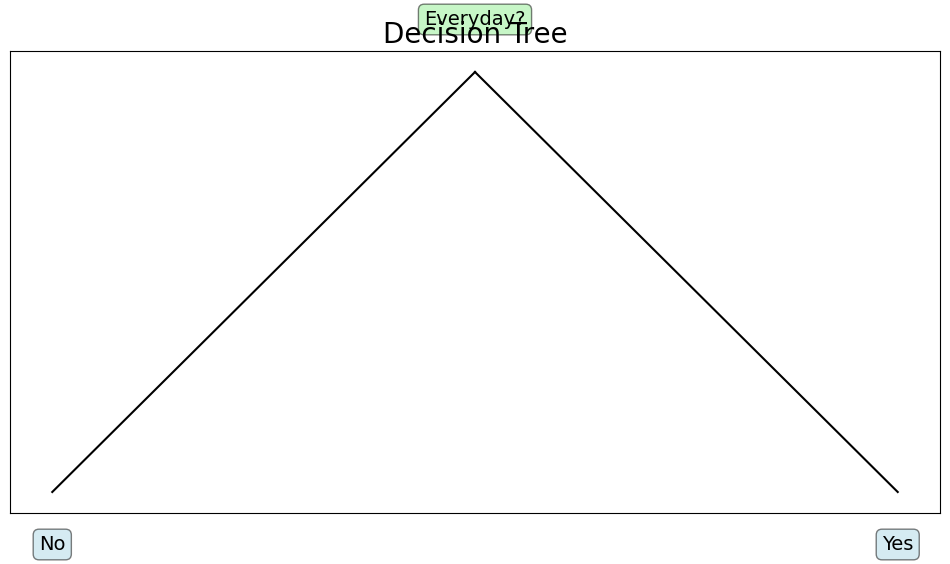

In [31]:

# Initialize and fit the decision tree
tree = DecisionTree(max_depth=3)
tree.fit(X, Y)

# Define feature names and class names
feature_names = X.columns.tolist()  
class_names = Y.unique().tolist()

# Plot the decision tree
tree.plot_tree(feature_names=feature_names, class_names=class_names, file_path="decision_tree.png")
